# Part one: Implementing Bethe-Bloch equation in Python

In [13]:
import scipy.constants as con
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
# This function takes the enrgy in MeV and atomic mass in kg as inputs to calculate the realtivistic velocity
def v(E: int, m: int) -> int:
    E = E * con.e * 10 ** 6
    return con.c*np.sqrt(1-(m*(con.c)**2/(E+m*(con.c)**2))**2)

# This function returns Beta as a function of the velocity, i.e. the ratio to the speed of light
def B(v: int) -> int:
    return v/con.c

# Bethe-Bloch function in aluminum. only n and I missing
def bethe(E: int, z = 1) -> int:
    n = (13 * 2698.9)/(27 * 1.6605390666e-27) #electron density
    I = 166 * con.e * 10 ** 6 #mean excitation energy
    dE = -(4 * con.pi * z ** 2 * n)/(con.m_e * con.c**2 * B(v(E, con.m_p))**2) * ((con.e**2)/(4 * con.pi * con.epsilon_0))**2 * (np.log((2 * con.m_e * con.c**2 * B(v(E, con.m_p))**2)/(I*(1-B(v(E, con.m_p))**2))) - B(v(E, con.m_p))**2)
    return dE / (con.e * 10 ** 6)

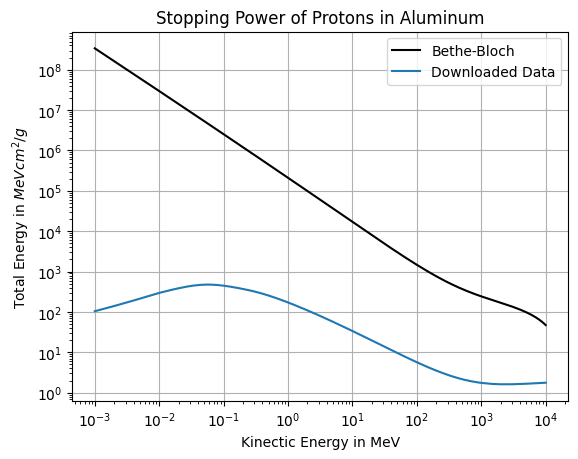

In [41]:
data = pd.read_csv("data/stopping_power_proton_in_aluminum.txt", skiprows=8, index_col=False, sep="\t", names=["E_kin", "E_tot"])

fig, ax = plt.subplots()

plt.plot(data.E_kin, bethe(data.E_kin), "k", label="Bethe-Bloch")

plt.plot(data.E_kin, data.E_tot, label="Downloaded Data")
plt.xlabel("Kinectic Energy in MeV")
plt.ylabel("Total Energy in $MeVcm^2/g$")
plt.xscale("log")
plt.yscale("log")
plt.title("Stopping Power of Protons in Aluminum")

plt.grid()
plt.legend()

plt.show()